In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math

In [10]:
df_bike = pd.read_csv(r'./dataset/hour.csv')

df_bike_new = df_bike.copy()

In [11]:
df_bike_new.shape

(17379, 17)

In [12]:
df_bike_new.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [13]:
df_bike_new = df_bike_new.drop(columns=['index','date','casual','registered'],axis=1)

## Drop unnecessary columns like index, date, casual, registered

In [14]:
df_bike_new.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


## Check for any null values

In [15]:
df_bike_new.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

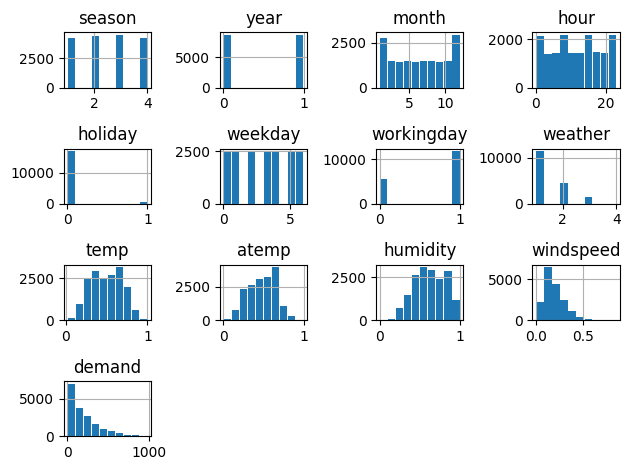

In [17]:
df_bike_new.hist(rwidth=0.9)
plt.tight_layout()

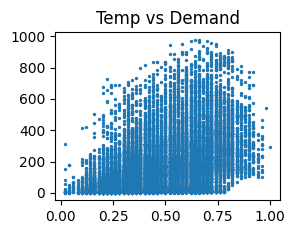

In [24]:
plt.subplot(2,2,1)
plt.title('Temp vs Demand')
plt.scatter(df_bike_new['temp'],df_bike_new['demand'], s=2)

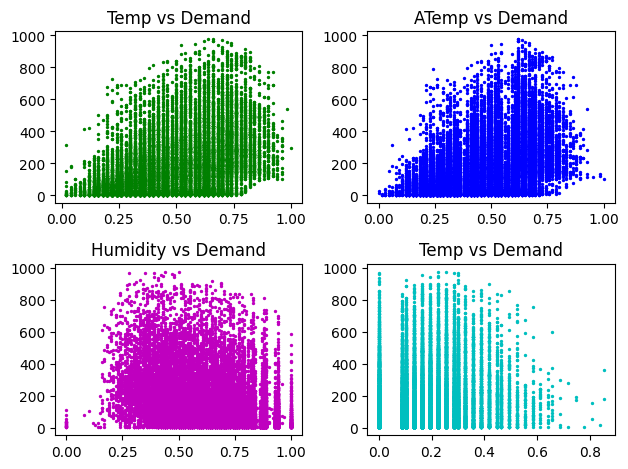

In [34]:
plt.subplot(2,2,1)
plt.title('Temp vs Demand')
plt.scatter(df_bike_new['temp'],df_bike_new['demand'], s=2, c='g')
plt.subplot(2,2,2)

plt.title('ATemp vs Demand')
plt.scatter(df_bike_new['atemp'],df_bike_new['demand'], s=2, c='b')

plt.subplot(2,2,3)
plt.title('Humidity vs Demand')
plt.scatter(df_bike_new['humidity'],df_bike_new['demand'], s=2, c='m')

plt.subplot(2,2,4)
plt.title('Temp vs Demand')
plt.scatter(df_bike_new['windspeed'],df_bike_new['demand'], s=2, c='c')

plt.tight_layout()

In [39]:
def get_category_average_demand(catname):
    cat_list = df_bike_new[catname].unique()
    cat_average = df_bike_new.groupby(catname).mean()['demand']
    return cat_list, cat_average

In [55]:
df_bike_new.columns

Index(['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'demand'],
      dtype='object')

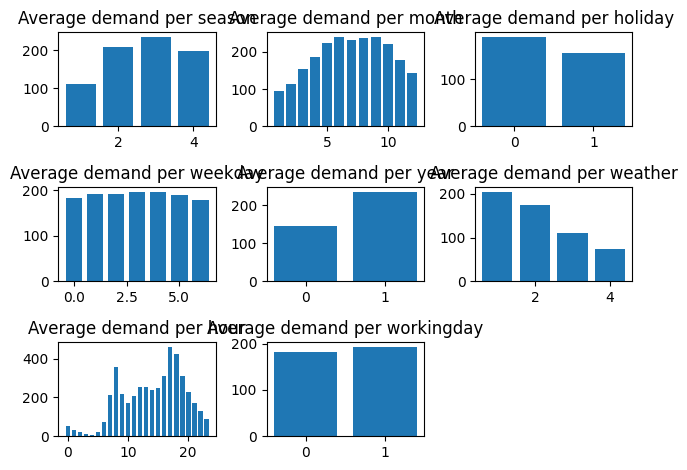

In [56]:
plt.subplot(3,3,1)
plt.title('Average demand per season')
cat_list, cat_average = get_category_average_demand("season")
plt.bar(cat_list, cat_average)

plt.subplot(3,3,2)
plt.title('Average demand per month')
cat_list, cat_average = get_category_average_demand("month")
plt.bar(cat_list, cat_average)
plt.tight_layout()

plt.subplot(3,3,3)
plt.title('Average demand per holiday')
cat_list, cat_average = get_category_average_demand("holiday")
plt.bar(cat_list, cat_average)

plt.subplot(3,3,4)
plt.title('Average demand per weekday')
cat_list, cat_average = get_category_average_demand("weekday")
plt.bar(cat_list, cat_average)

plt.subplot(3,3,5)
plt.title('Average demand per year')
cat_list, cat_average = get_category_average_demand("year")
plt.bar(cat_list, cat_average)

plt.subplot(3,3,6)
plt.title('Average demand per weather')
cat_list, cat_average = get_category_average_demand("weather")
plt.bar(cat_list, cat_average)

plt.subplot(3,3,7)
plt.title('Average demand per hour')
cat_list, cat_average = get_category_average_demand("hour")
plt.bar(cat_list, cat_average)

plt.subplot(3,3,8)
plt.title('Average demand per workingday')
cat_list, cat_average = get_category_average_demand("workingday")
plt.bar(cat_list, cat_average)

plt.tight_layout()

### Check for outliers

In [57]:
df_bike_new['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [58]:
df_bike_new['demand'].quantile([0.05, 0.1, 0.15, 0.9, 0.95, 0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

## Test for Multicollinearity 

In [66]:
corr = df_bike_new[['temp','atemp','humidity','windspeed','demand']].corr()
corr

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


In [70]:
df_bike_new.drop(['weekday','year','workingday','atemp','windspeed'], axis=1, inplace=True)

In [71]:
df_bike_new.head()

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1


## Check for Auto-Correlation

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474717, 0.4704956 , 0.49622816, 0.49404055, 0.46795937,
        0.47732046, 0.5267577 , 0.5914575 , 0.6520158 , 0.71519554,
        0.8059103 , 0.9253097 , 1.        , 0.9253097 , 0.8059103 ,
        0.71519554, 0.6520158 , 0.5914575 , 0.5267577 , 0.47732046,
        0.46795937, 0.49404055, 0.49622816, 0.4704956 , 0.45474717],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x27d509071d0>)

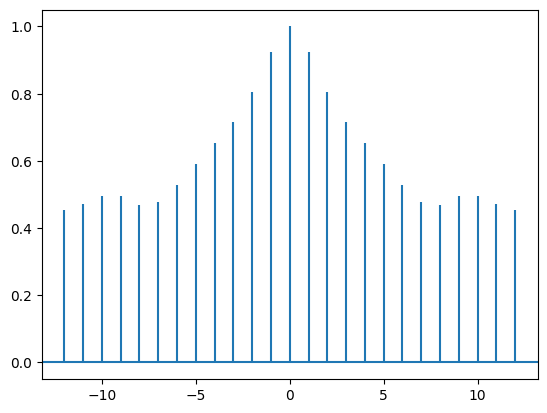

In [73]:
df1 = pd.to_numeric(df_bike_new['demand'], downcast='float')
plt.acorr(df1, maxlags=12)

There is high autocorrelation for the demand feature

In [74]:
df_bike_new['demand'] = np.log(df_bike_new['demand'])

In [75]:
df_bike_new.head()

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,2.772589
1,1,1,1,0,1,0.22,0.80,3.688879
2,1,1,2,0,1,0.22,0.80,3.465736
3,1,1,3,0,1,0.24,0.75,2.564949
4,1,1,4,0,1,0.24,0.75,0.000000


In [76]:
t_1 = df_bike_new['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = df_bike_new['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3 = df_bike_new['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']

df_bike_new_lag = pd.concat([df_bike_new, t_1, t_2, t_3], axis=1)

In [77]:
df_bike_new_lag.head(20)

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
0,1,1,0,0,1,0.24,0.81,2.772589,NaN,NaN,NaN
1,1,1,1,0,1,0.22,0.80,3.688879,2.772589,NaN,NaN
2,1,1,2,0,1,0.22,0.80,3.465736,3.688879,2.772589,NaN
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000
8,1,1,8,0,1,0.24,0.75,2.079442,1.098612,0.693147,0.000000
9,1,1,9,0,1,0.32,0.76,2.639057,2.079442,1.098612,0.693147


### drop NAN

In [78]:
df_bike_new_lag = df_bike_new_lag.dropna()
df_bike_new_lag.head()

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000


Create Dummy Variable and Drop first to avoid dummy variables trap using get_dummies

In [79]:
df_bike_new_lag['season'] = df_bike_new_lag['season'].astype('category')
df_bike_new_lag['holiday'] = df_bike_new_lag['holiday'].astype('category')
df_bike_new_lag['weather'] = df_bike_new_lag['weather'].astype('category')
df_bike_new_lag['month'] = df_bike_new_lag['month'].astype('category')
df_bike_new_lag['hour'] = df_bike_new_lag['hour'].astype('category')

df_bike_new_lag = pd.get_dummies(df_bike_new_lag,drop_first=True)

In [80]:
df_bike_new_lag.head()

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### split train test data for Time Searies Data

In [81]:
y = df_bike_new_lag[['demand']]
X = df_bike_new_lag.drop(['demand'], axis=1)

In [82]:
tr_size = 0.7 * len(X)
tr_size = int(tr_size)

In [83]:
X_train = X.values[0: tr_size]
X_test = X.values[tr_size: len(X)]

y_train = y.values[0: tr_size]
y_test = y.values[tr_size: len(y)]

### Train Model

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
std_reg = LinearRegression()
std_reg.fit(X_train, y_train)

r2_train = std_reg.score(X_train, y_train)
r2_test = std_reg.score(X_test, y_test)

y_pred = std_reg.predict(X_test)

print(r2_train, r2_test)

0.9195240591465778 0.9287151360253386


In [87]:
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

0.3809880049817042


Calculate RMSLE Root Mean Squared Log Error

In [88]:
y_test_e = []

y_pred_e = []

for i in range(0, len(y_test)):
    y_test_e.append(math.exp(y_test[i]))
    y_pred_e.append(math.exp(y_pred[i]))

log_sq_sum = 0

for i in range(0, len(y_test_e)):
    log_a = math.log(y_test_e[i] + 1)
    log_p = math.log(y_pred_e[i] + 1)
    
    log_dff = (log_p - log_a) ** 2
    log_sq_sum = log_sq_sum + log_dff
    
rmsle = math.sqrt(log_sq_sum / len(y_test))
print(rmsle)

0.3560941706980208


C:\Users\smite\AppData\Local\Temp\ipykernel_31352\2161515858.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_test_e.append(math.exp(y_test[i]))
C:\Users\smite\AppData\Local\Temp\ipykernel_31352\2161515858.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_e.append(math.exp(y_pred[i]))
